In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
# Load LIBOR-OIS spread
data = pd.read_csv("data/libor_ois.csv").iloc[:, :3]
data.columns.values[1:3] = ["libor", "ois"]
data['spread'] = 100*(data['libor'] - data['ois'])
data['date'] = pd.to_datetime(data['date'], format="%m/%d/%Y")
data['yyyymm'] = data['date'].dt.strftime('%Y%m').astype(int)
data = data[data['yyyymm'] >= 200200]
print(f"Date range: {data['date'].min().strftime('%Y-%m-%d')} - {data['date'].max().strftime('%Y-%m-%d')}")

Date range: 2002-01-01 - 2019-10-31


In [32]:
# Load uncertainty
dat2 = pd.read_csv("data/mpu.csv")
dat2['date'] = pd.to_datetime(dat2['date'])
dat2['yyyymm'] = dat2['date'].dt.strftime('%Y%m').astype(int)
print(f"MPU date range: {dat2['date'].min().strftime('%Y-%m-%d')} - {dat2['date'].max().strftime('%Y-%m-%d')}")

MPU date range: 1990-01-02 - 2020-09-30


In [34]:
# Create a table with NaN values
tbl = pd.DataFrame(np.nan, index=["1/2002-6/2007", "7/2007-6/2009", "7/2009-10/2019"], 
                   columns=["Mean", "SD", "Avg MPU"])
# Specify the date ranges
ranges = [(200201, 200706), (200707, 200906), (200907, 201712)]
# Calculate statistics for each date range
for i, (from_date, to_date) in enumerate(ranges):
    ind = (data['yyyymm'] >= from_date) & (data['yyyymm'] <= to_date)
    tbl.iloc[i, :2] = [data.loc[ind, 'spread'].mean(), data.loc[ind, 'spread'].std()]
    print("SD of one year changes:")
    print(data.loc[ind, 'spread'].diff(250).std())
    ind2 = (dat2['yyyymm'] >= from_date) & (dat2['yyyymm'] <= to_date)
    tbl.iloc[i, 2] = 100*dat2.loc[ind2, 'mpu10'].mean()  # Python pandas excludes NA values by default
# Print rounded table
print(tbl.round())
# Save the table as a LaTeX table
with open('output/table_A1.tex', 'w') as f:
    f.write(tbl.round().to_latex())

SD of one year changes:
3.2431215257873913
SD of one year changes:
70.38839637256817
SD of one year changes:
14.459169345694885
                Mean    SD  Avg MPU
1/2002-6/2007   11.0   4.0     96.0
7/2007-6/2009   89.0  59.0    115.0
7/2009-10/2019  20.0   9.0     59.0


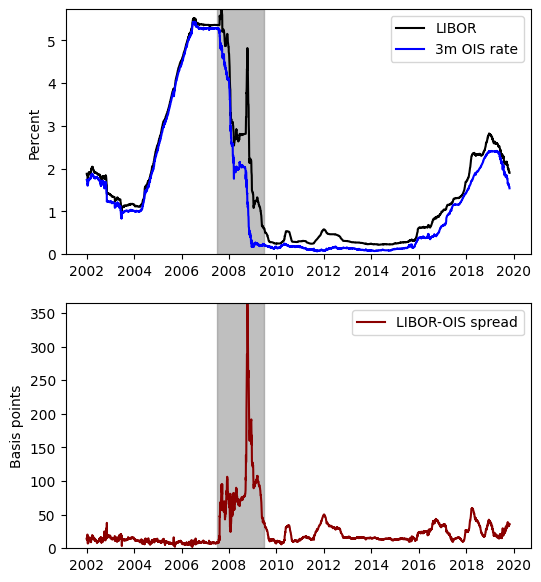

In [35]:
# Define the dates
date1 = datetime.strptime('2007-07-01', '%Y-%m-%d')
date2 = datetime.strptime('2009-06-30', '%Y-%m-%d')
# Define colors
cols = ['black', 'blue', 'darkred']
# Create a new figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 7))
# Top panel: LIBOR and OIS
yrange = [0, max(data['libor'].max(), data['ois'].max())]
axes[0].plot(data['date'], data['libor'], color=cols[0])
axes[0].plot(data['date'], data['ois'], color=cols[1])
axes[0].fill_betweenx(yrange, date1, date2, color='gray', alpha=0.5)
axes[0].set_ylim(yrange)
axes[0].set_ylabel("Percent")
axes[0].legend(["LIBOR", "3m OIS rate"], loc='upper right')
# Bottom panel: spread
yrange = [0, data['spread'].max()]
axes[1].plot(data['date'], data['spread'], color=cols[2])
axes[1].fill_betweenx(yrange, date1, date2, color='gray', alpha=0.5)
axes[1].set_ylim(yrange)
axes[1].set_ylabel("Basis points")
axes[1].legend(["LIBOR-OIS spread"], loc='upper right')
# Save the figure
plt.savefig("output/figure_A1.pdf", format='pdf', dpi=300)
